<a href="https://colab.research.google.com/github/AsthmaticDonkey/Thesis/blob/master/MatchImage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
pip install image-match

     |████████████████████████████████| 20.7MB 4.8MB/s 
     |████████████████████████████████| 61kB 23.7MB/s 
  Created wheel for image-match: filename=image_match-1.1.2-cp36-none-any.whl size=21229 sha256=5421cc32b6dd83813753e1268679bed2f2548112ca4abccc259bd6d8b4bde493
  Stored in directory: /root/.cache/pip/wheels/31/a7/b6/cfa60a9034872415c1b49505b28f737014d77459ecb9e94e85
  Created wheel for scikit-image: filename=scikit_image-0.12.3-cp36-cp36m-linux_x86_64.whl size=26738664 sha256=57f62ebae40391437dc297b8628c90b11525fd545bf406d93c3c5d0d70030515
  Stored in directory: /root/.cache/pip/wheels/bc/98/ff/364a64db93b1909ecc2d1e75035ec56f27b5f53b4b31527fe1
Successfully built image-match scikit-image
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scikit-image 0.15.0
    Uninstalling scikit-image-0.15.0:
      Successfully uninstalled scikit-image-0.15.0


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from fastai import *
from fastai.vision import *

In [0]:

path = Path('/content/data/Anatomy/')

path = Path('Anatomy')
dest = path
dest.mkdir(parents=True, exist_ok=True)

In [0]:
import image_match

In [0]:
from image_match.goldberg import ImageSignature
gis = ImageSignature()
a = gis.generate_signature('/content/Anatomy/087.png')
b = gis.generate_signature('/content/Anatomy/175.png')
gis.normalized_distance(a, b)

0.6248529238713606

In [0]:
import os
from image_match.goldberg import ImageSignature

gis = ImageSignature()
a = gis.generate_signature('/content/Anatomy/087.png')
directory = '/content/Anatomy'
mlist = [] 

for filename in os.listdir(r'/content/Anatomy'):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        b = gis.generate_signature(os.path.join(directory, filename))
        #print(gis.normalized_distance(a, b))
        if(gis.normalized_distance(a, b)<0.4):
            mlist.append([gis.normalized_distance(a, b),os.path.join(directory, filename)])
        
    else:
        continue
        
numMatch = 1
d = ''
for i in mlist:
    if(i[0] < numMatch):
      numMatch = i[0]
      d = i[1]
      
print(d)
print(numMatch)

/content/Anatomy/087.png
0.0


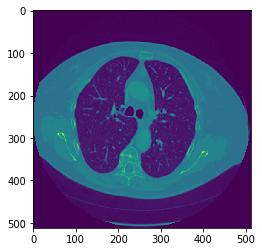

In [0]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img=mpimg.imread('/content/Anatomy/087.png')
imgplot = plt.imshow(img)

In [0]:
b = gis.generate_signature(img)
print(gis.normalized_distance(a, b))

0.44388818235346283


0.3715555788347209
0.40323925270151784
0.3777858474894927
0.4753412857144807
0.40251672603081384
0.6922410000668852
0.5476209727672431
0.3968266544152796
0.6801477689074145
0.3995241799143362
0.3628990076015493
0.42213590714291416
0.4728847251573277
0.5110786372426677
0.5094613951429217
0.6834736947017354
0.4738588222626679
0.6894432829419006
0.47656481743146195
0.6922410000668852
0.3830417982387069
0.6370220815902023
0.40156644421948123
0.557987211841821
0.5107738806637515
0.5073419904186397
0.5292438117990463
0.5412002585794273
0.40572698075912234
0.49768550525499705
0.38163613552233083
0.5590234006857379
0.37919813595651075
0.673623632867595
0.5194632564524861
0.6481881060541222
0.411514433663106
0.6894432829419006
0.6802545405452808
0.6845787458593862
0.6842251219958809
0.5011458281630314
0.39956342239335746
0.35904498788927985
0.7086631457556514
0.5524020953094021
0.6795468289032043
0.40648962824430446
0.5475697750723202
0.6842251219958809
0.4860251989169215
0.6894432829419006
0.5

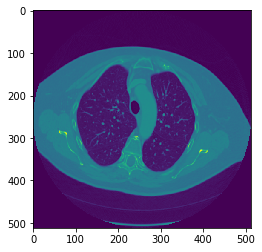

In [0]:
import os
from image_match.goldberg import ImageSignature

gis = ImageSignature()
a = gis.generate_signature('/content/Anatomy/064.png')
directory = '/content/Anatomy/'
mlist2 = [] 

d3img = []

for filename in os.listdir(r'/content/Anatomy'):
    if filename.endswith(".png"):
      st = directory+filename
      img1 = mpimg.imread(st)
      d3img.append(img1)
      
count = -1;
for im in d3img:
  count = count+1
  b = gis.generate_signature(im)
  print(gis.normalized_distance(a, b))
  if(gis.normalized_distance(a, b) < 0.4):
    mlist2.append([gis.normalized_distance(a, b),count])
    
        
numMatch = 2
n = 0
for i in mlist2:
  if(numMatch>i[0]):
    numMatch = i[0]
    n = i[1]
      
imgplot = plt.imshow(d3img[n])